In [37]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [38]:
all_df = pd.read_excel("data/titanic3.xls")

In [39]:
cols=['survived','name','pclass' ,'sex', 'age', 'sibsp',
      'parch', 'fare', 'embarked']
all_df=all_df[cols]

In [40]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]

In [41]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1309 train: 1034 test: 275


In [42]:
def PreprocessData(raw_df):
    df=raw_df.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex']= df['sex'].map({'female':0, 'male': 1}).astype(int)
    x_OneHot_df = pd.get_dummies(data=df,columns=["embarked" ])

    ndarray = x_OneHot_df.values
    Features = ndarray[:,1:]
    Label = ndarray[:,0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaledFeatures=minmax_scale.fit_transform(Features)    
    
    return scaledFeatures,Label

In [43]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

In [44]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN

In [45]:
model = Sequential()

In [46]:
model.add(Embedding(input_dim=9,output_dim=1))

In [47]:
model.add(SimpleRNN(units=4))

In [48]:
model.add(Dense(1, activation = "sigmoid"))

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 1)           9         
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 4)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [51]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Train on 930 samples, validate on 104 samples
Epoch 1/30
 - 1s - loss: 0.6846 - acc: 0.5871 - val_loss: 0.6222 - val_acc: 0.7885
Epoch 2/30
 - 0s - loss: 0.6783 - acc: 0.5871 - val_loss: 0.6016 - val_acc: 0.7885
Epoch 3/30
 - 0s - loss: 0.6774 - acc: 0.5871 - val_loss: 0.6102 - val_acc: 0.7885
Epoch 4/30
 - 0s - loss: 0.6761 - acc: 0.5871 - val_loss: 0.6033 - val_acc: 0.7885
Epoch 5/30
 - 0s - loss: 0.6715 - acc: 0.5871 - val_loss: 0.6014 - val_acc: 0.7885
Epoch 6/30
 - 0s - loss: 0.6582 - acc: 0.5989 - val_loss: 0.5880 - val_acc: 0.7885
Epoch 7/30
 - 0s - loss: 0.6230 - acc: 0.6957 - val_loss: 0.5513 - val_acc: 0.8173
Epoch 8/30
 - 0s - loss: 0.5778 - acc: 0.7914 - val_loss: 0.5211 - val_acc: 0.8173
Epoch 9/30
 - 0s - loss: 0.5501 - acc: 0.7817 - val_loss: 0.5017 - val_acc: 0.8173
Epoch 10/30
 - 0s - loss: 0.5328 - acc: 0.7914 - val_loss: 0.4887 - val_acc: 0.8173
Epoch 11/30
 - 0s - loss: 0.5201 - acc: 0.7914 - val_loss: 0.4791 - val_acc: 0.8173
Epoch 12/30
 - 0s - loss: 0.5110 - acc:

In [52]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

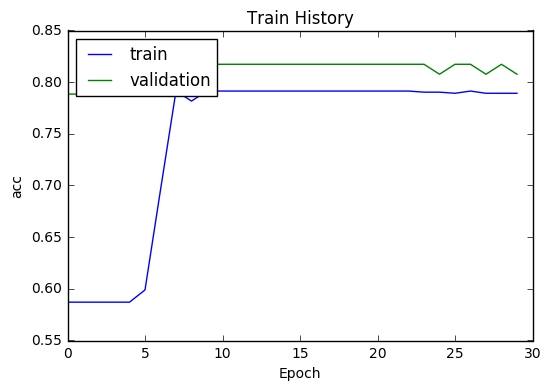

In [53]:
show_train_history(train_history,'acc','val_acc')

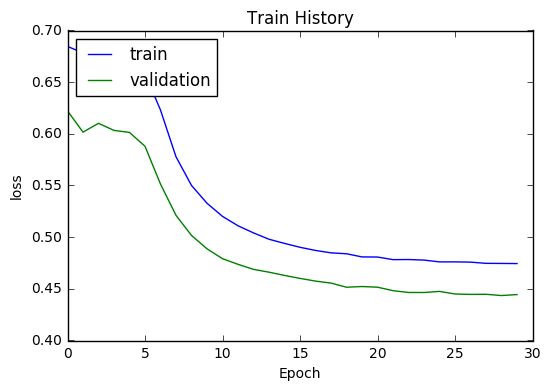

In [54]:
show_train_history(train_history,'loss','val_loss')

In [55]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

275/275 [==============================] - 0s 69us/step


In [56]:
scores[1]

0.7963636367971247